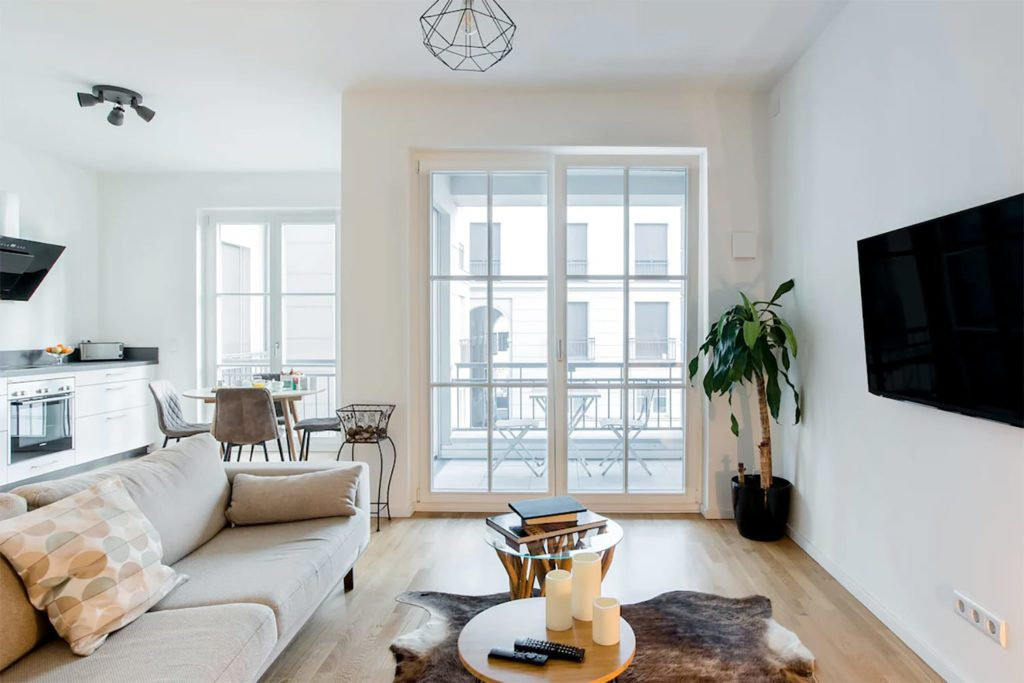

## Import Libraries

In [17]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

import sklearn.model_selection as sm 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## Read Dataset

I couldn't import the dataset via url pandas gave error beacuse of the url.So,I add the link.https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021(http://insideairbnb.com/get-the-data.html)


In [18]:
df=pd.read_csv("listings_berlin.csv")    
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,2021-01-02,1.02,1,0
5,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54301,13.41534,Private room,33,1,293,2019-12-11,2.44,1,0
6,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,200,6,8,2020-01-04,0.17,1,1
7,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,90,26,2013-02-01,0.26,3,238
8,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90,60,48,2017-12-14,0.41,2,73
9,17904,Beautiful Kreuzberg studio/fast WiFi,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,49,5,287,2021-01-16,2.26,1,288


## Explarotary Data Analysis

In [19]:
df=df.drop(['id'], axis=1)
  

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19095 entries, 0 to 19094
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            19065 non-null  object 
 1   host_id                         19095 non-null  int64  
 2   host_name                       19083 non-null  object 
 3   neighbourhood_group             19095 non-null  object 
 4   neighbourhood                   19095 non-null  object 
 5   latitude                        19095 non-null  float64
 6   longitude                       19095 non-null  float64
 7   room_type                       19095 non-null  object 
 8   price                           19095 non-null  int64  
 9   minimum_nights                  19095 non-null  int64  
 10  number_of_reviews               19095 non-null  int64  
 11  last_review                     14940 non-null  object 
 12  reviews_per_month               

When we look at the dataset there are 19095 entries and 15 column which consist of 3 float64,6 int64 and 6 object dtypes. 


In [21]:
df.isnull().sum()       #Checking missing values 

name                                30
host_id                              0
host_name                           12
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4155
reviews_per_month                 4155
calculated_host_listings_count       0
availability_365                     0
dtype: int64

There are 4155 missing values in column of "last_review" and reviews_per_month" . The relationship between the two columns and whether they are in the same row is checked below.

<AxesSubplot:>

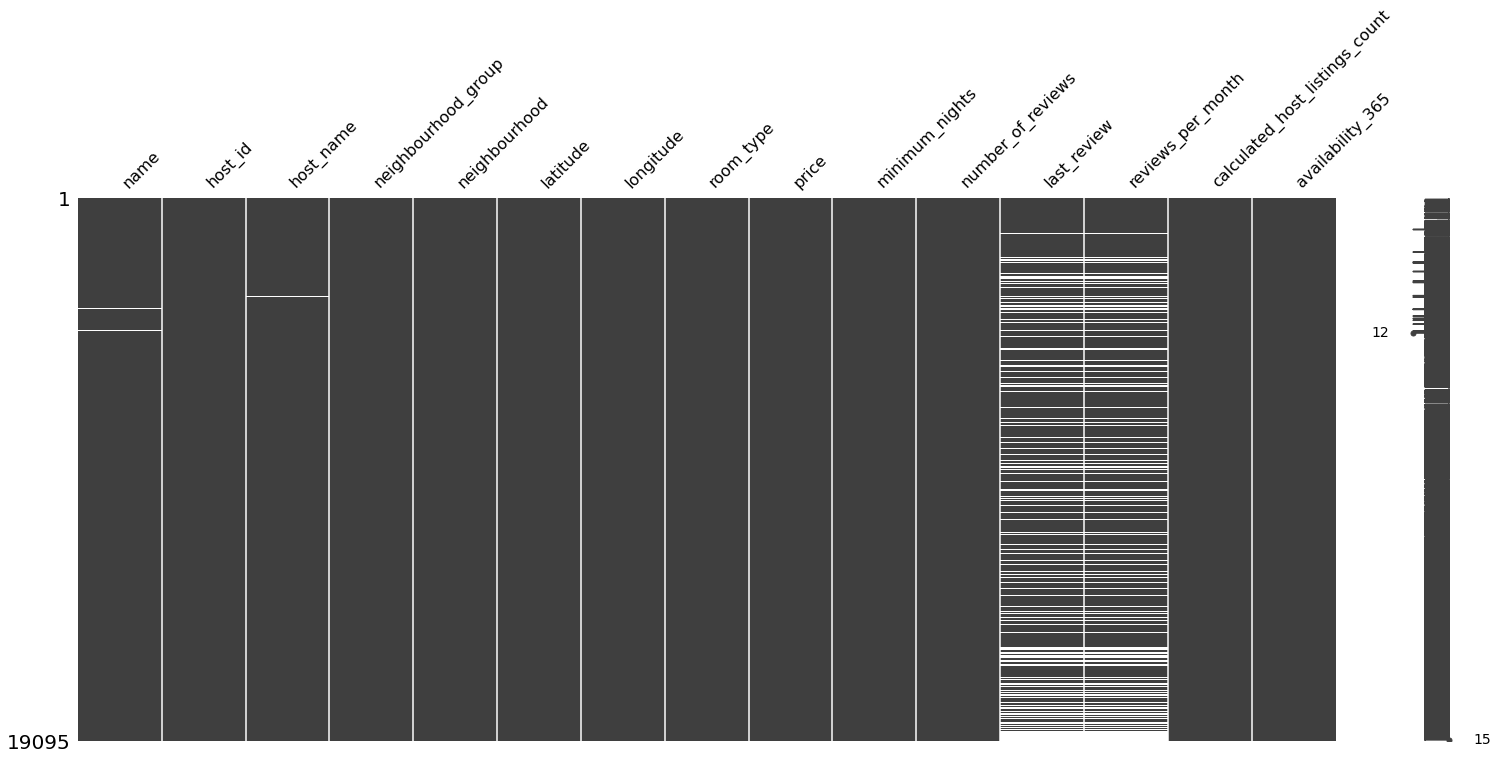

In [22]:
msno.matrix(df)  

Showing missing values in each row. When we look at this matrix The missing values in reviews columns seem to be in the same row in summary there might be a correlation or dependency in between missingness of columns. In order to understand that we looked at their correlation heatmap below if there is a relationship between missing values.

<AxesSubplot:>

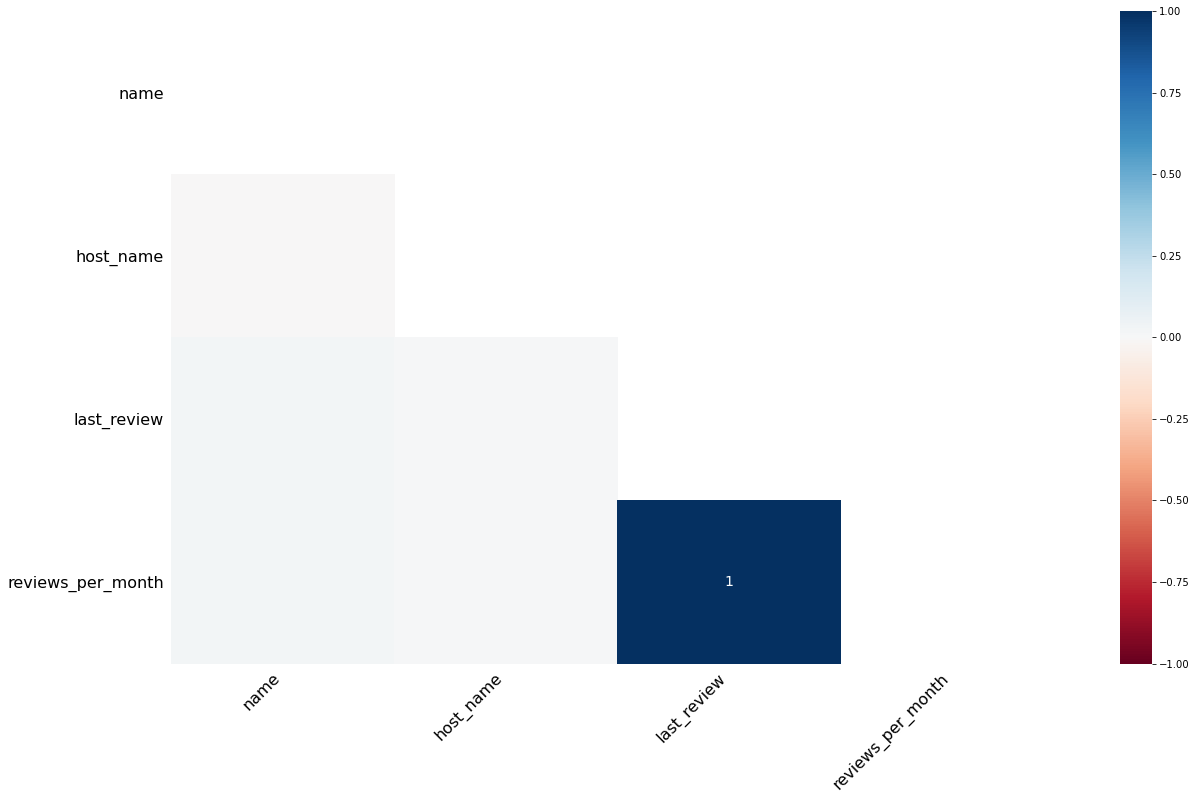

In [23]:
msno.heatmap(df)   

As we see in the heatmap the correlation rate is 1.0 and so the rows which don't have last_review also their values of reviews_per_month is missing.

<AxesSubplot:>

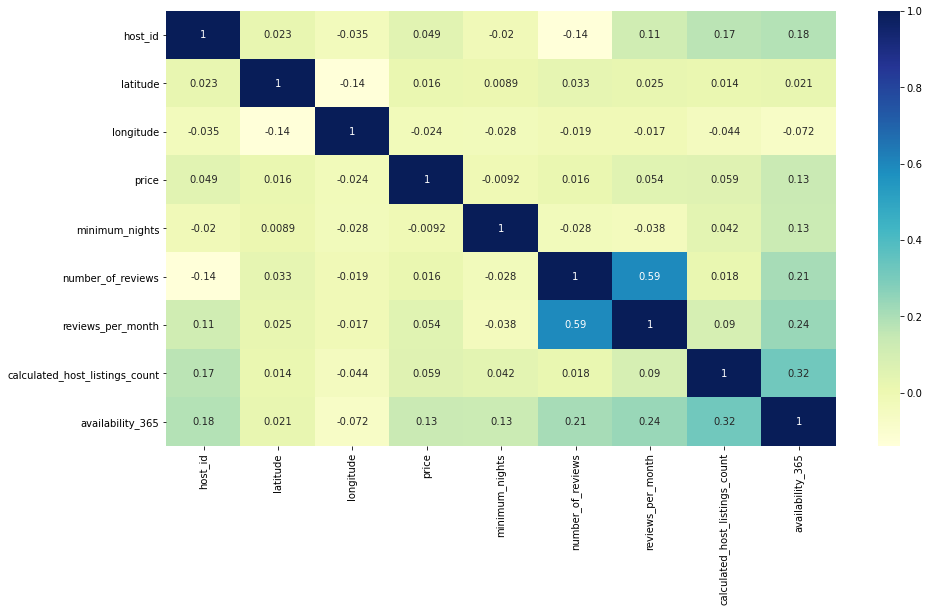

In [24]:
plt.figure(figsize = (15,8))              
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In the correlation heatmap,reviews_per_month is showing a bit higher correlation with number_of_reviews.It is logical as the reviews_per_month is calculated according to number of reviews.Other columns seem to be very low correlation to each other.

In [25]:
df.duplicated().value_counts()  #Checking duplicated values 

False    19095
dtype: int64

In [26]:
df.describe() #numerical variables

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.909500e+04,19095.000000,19095.000000,19095.000000,19095.000000,19095.000000,14940.000000,19095.000000,19095.000000
mean,9.302362e+07,52.510215,13.404654,73.303221,9.105944,21.637078,0.718274,3.135847,91.271694
std,1.071839e+08,0.032391,0.062953,136.249622,33.635956,48.670427,1.445272,7.773246,127.645330
min,1.581000e+03,52.340070,13.097150,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.180492e+07,52.489710,13.367160,35.000000,2.000000,1.000000,0.090000,1.000000,0.000000
50%,4.377035e+07,52.509950,13.414090,52.000000,3.000000,4.000000,0.270000,1.000000,0.000000
75%,1.445742e+08,52.533320,13.438900,81.000000,5.000000,17.000000,0.830000,2.000000,175.000000
max,4.120595e+08,52.656110,13.757370,8000.000000,1124.000000,620.000000,94.350000,76.000000,365.000000


Here we are observing the number of unique values for each numerical features and their mean,standard deviation,min and max value in corresponding category.

In [27]:
df.describe(include=['O']) #categorical variables

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,19065,19083,19095,19095,19095,14940
unique,18545,5341,12,138,4,2213
top,Deluxe Apartment in Berlin Mitte,Anna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,Entire home/apt,2020-01-02
freq,20,145,4197,1079,10636,111


Here we are observing the number of unique values for each categorical features and their most frequent values in corresponding category.


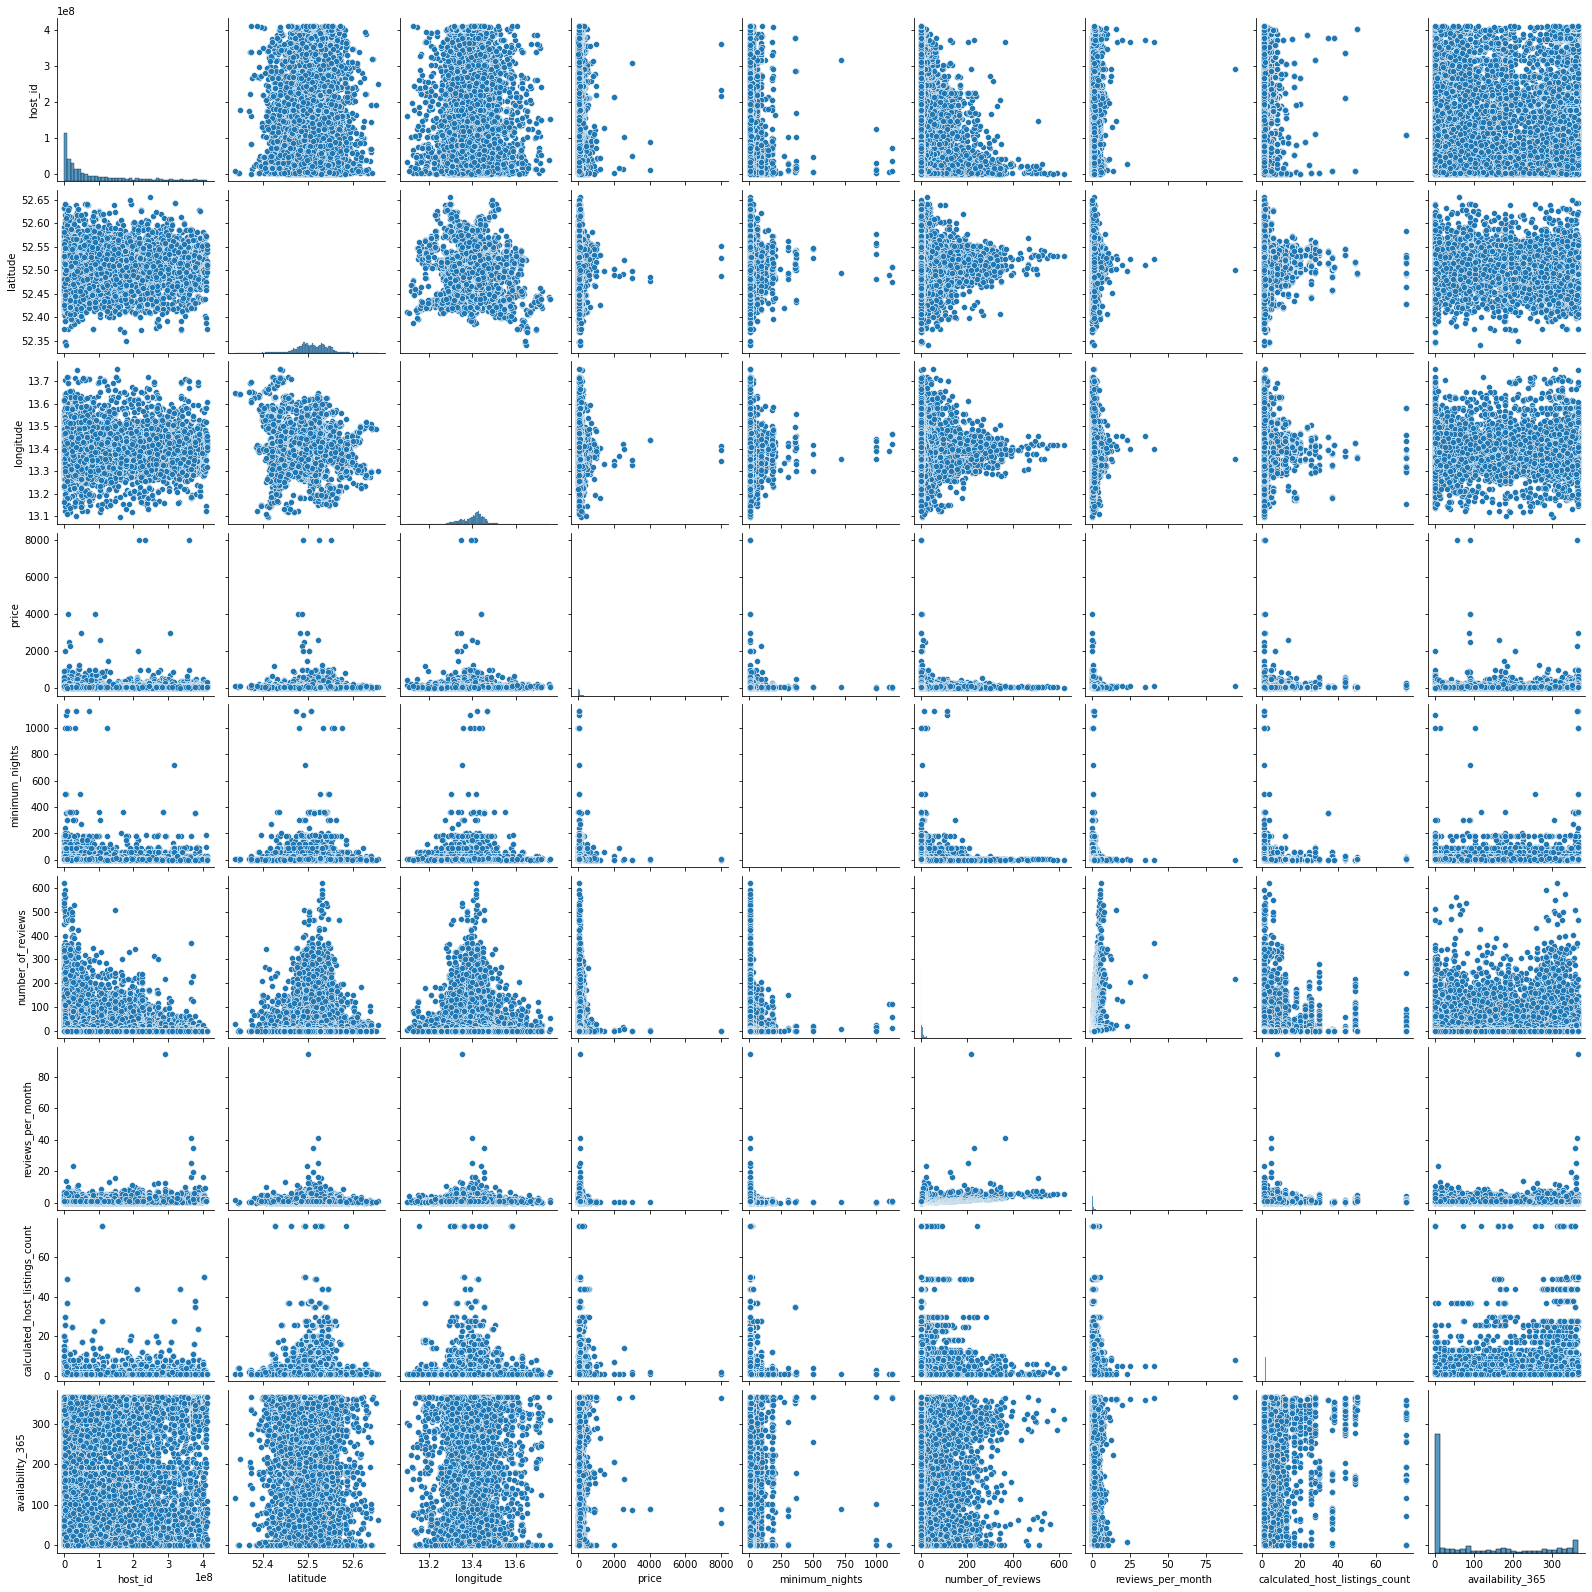

In [28]:
sns.pairplot(df)

Looking at the graphics, no obvious pattern is seen among the features.

In [29]:
df.loc[df['number_of_reviews'] == 0]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
64,Apartment near Kudamm (WLAN / WiFi),586511,Thomas,Charlottenburg-Wilm.,Düsseldorfer Straße,52.492150,13.296050,Entire home/apt,86,3,0,NaN,NaN,1,363
110,"Well located, cozy 2 rooms apartment, all clos...",939230,Nana M,Pankow,Pankow Süd,52.555270,13.421040,Entire home/apt,75,3,0,NaN,NaN,1,0
119,TOP apartment in art nouveau villa,977942,Rainer,Steglitz - Zehlendorf,Zehlendorf Nord,52.437040,13.223430,Entire home/apt,89,60,0,NaN,NaN,1,365
124,CENTRAL VINTAGE-MODERN FLAT,965569,Coco,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.513990,13.463240,Entire home/apt,150,2,0,NaN,NaN,1,0
153,Holiday Apartment in Berlin Wannsee with balcony,1275359,Henning,Steglitz - Zehlendorf,Zehlendorf Südwest,52.416430,13.164450,Entire home/apt,95,5,0,NaN,NaN,3,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19090,Enjoy Berlin at the best place !,79948380,Ricardo,Mitte,Parkviertel,52.548600,13.351634,Entire home/apt,90,2,0,NaN,NaN,1,117
19091,Zentrale 2-Zimmerwohnung in Berlin,63062620,Jonas,Tempelhof - Schöneberg,Schöneberg-Nord,52.501473,13.354805,Entire home/apt,78,2,0,NaN,NaN,1,67
19092,Beautiful room in spacious Neukölln flat,7517055,Laura,Neukölln,Neuköllner Mitte/Zentrum,52.480657,13.427291,Private room,35,3,0,NaN,NaN,2,1
19093,Central in the capital berlin,76282923,Zarina,Mitte,Alexanderplatz,52.527802,13.408350,Private room,49,16,0,NaN,NaN,1,25


When I checked missing value of reviews_per_month the related rows has zero number of reviews.Thus, I will fill these missing values with 0.

<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

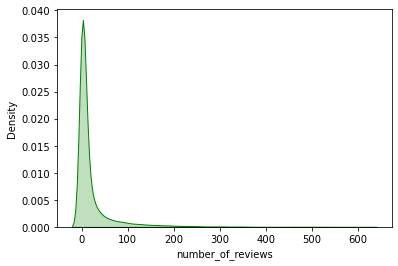

In [30]:
sns.kdeplot(df.number_of_reviews, shade=True, color="g",)


When we look at the distribution of the price according to the neighborhood, it seems that there is a balanced distribution between classes.Hovewer there are few outlier values like 8000.

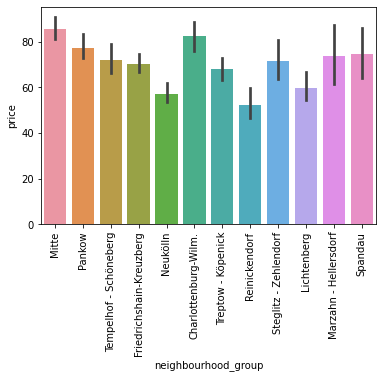

In [31]:
dist_neighbourhood_group=sns.barplot(x="neighbourhood_group", y="price",data=df)
dist_neighbourhood_group.tick_params(axis='x', rotation=90)




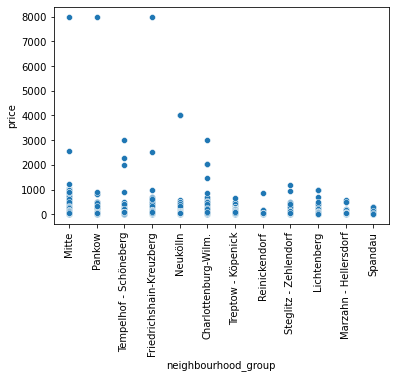

In [32]:
b=sns.scatterplot(data=df, x="neighbourhood_group",y='price')
b.tick_params(axis='x', rotation=90)

I used boxplot graphic to find outliers and calculated lower and upper bound of price using IQR values.

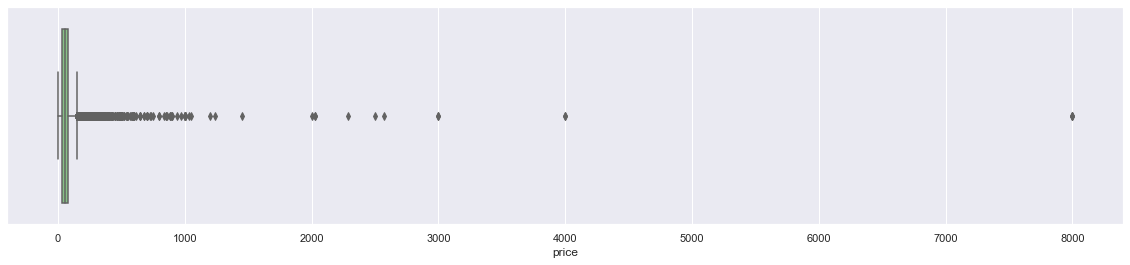

In [33]:
sns.set(rc={'figure.figsize':(20,4)})
ax = sns.boxplot(x='price', data=df,palette='Accent')

In [34]:
df_price=df["price"].copy()
Q1=df_price.quantile(0.25)
Q3=df_price.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print("lower bound is:  "+ str(lower_bound))
print("upper bound is:  "+str(upper_bound))
print(Q1)
print(Q3)

lower bound is:  -34.0
upper bound is:  150.0
35.0
81.0


In [35]:
df.loc[df['price'] >= 1000]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1256,250 qm penthouse with roof terrace for photoshoot,14623546,Jean Luc,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.49185,13.41961,Entire home/apt,2500,1,19,2015-10-14,0.25,1,89
3098,New York style cosy loft in Berlin,16101198,Ivan,Tempelhof - Schöneberg,Schöneberg-Süd,52.48700,13.36565,Entire home/apt,2286,91,6,2015-09-27,0.08,1,363
6240,Cosy Apartment / Modern Design 120 sqm,40060996,Christoph,Mitte,Osloer Straße,52.55547,13.38642,Entire home/apt,1050,2,3,2017-02-23,0.05,1,364
6413,"42 m2, a nice flat in the Akazien area",1338050,Jean-Jacques,Tempelhof - Schöneberg,Schöneberg-Nord,52.49051,13.34593,Entire home/apt,2000,30,4,2017-06-07,0.08,1,0
7684,Luxury Penthouse with sauna and rooftop terrace,102979040,Team Suite030,Mitte,Alexanderplatz,52.52267,13.39935,Entire home/apt,2575,2,8,2018-10-29,0.17,14,163
10082,Luxuriöse 2 Zi Wohnung in bester Lage zum Kudamm,127288493,Frank,Charlottenburg-Wilm.,Düsseldorfer Straße,52.49941,13.33406,Entire home/apt,1450,61,0,NaN,NaN,1,177
10101,"cheap, cozy room in the heart of neukölln",89306331,Hanne,Neukölln,Rixdorf,52.47790,13.43968,Entire home/apt,4000,1,3,2018-07-26,0.08,1,90
10302,Berlin day and night on classical beauty,12917471,Torsten,Steglitz - Zehlendorf,Zehlendorf Südwest,52.42516,13.18048,Entire home/apt,1200,1,0,NaN,NaN,1,185
11128,Junior Suite In The Center Of West Berlin,212377709,Hotel Zoo,Charlottenburg-Wilm.,Kurfürstendamm,52.50372,13.32913,Hotel room,2025,1,0,NaN,NaN,7,205
11129,King Suite In The Center Of West Berlin,212377709,Hotel Zoo,Charlottenburg-Wilm.,Kurfürstendamm,52.50372,13.32913,Hotel room,2025,1,0,NaN,NaN,7,205


In [36]:
null_price=df.loc[df['price'] <= 0]       #checking the prices which is zero
null_price.head(7)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15857,Classik Hotel Hackescher Markt,273509888,Classik Hotel Hackescher Markt,Mitte,Alexanderplatz,52.523220,13.401290,Hotel room,0,1,10,2020-10-13,0.45,1,0
16011,Hotel Delta am Potsdamer Platz,316070228,Hotel Delta Am Potsdamer Platz,Mitte,Tiergarten Süd,52.501200,13.362870,Hotel room,0,1,0,NaN,NaN,1,0
16081,Pentahotel Berlin-Köpenick,304236789,Pentahotel,Treptow - Köpenick,Kölln. Vorstadt/Spindlersf.,52.443970,13.569720,Hotel room,0,1,0,NaN,NaN,1,0
16331,aletto Hotel Kudamm,312172749,Aletto Hotel Kudamm,Charlottenburg-Wilm.,Otto-Suhr-Allee,52.506580,13.329350,Hotel room,0,1,0,NaN,NaN,1,0
17332,Max Brown Hotel Ku'Damm,370237375,Sircle,Charlottenburg-Wilm.,Düsseldorfer Straße,52.496910,13.323850,Hotel room,0,1,0,NaN,NaN,1,0
17383,Pestana Berlin Tiergarten,371642141,Pestana,Mitte,Tiergarten Süd,52.508410,13.348570,Hotel room,0,1,0,NaN,NaN,1,0
17764,Sir Savigny,380683890,Sircle,Charlottenburg-Wilm.,Kantstraße,52.506773,13.321417,Hotel room,0,1,0,NaN,NaN,1,0


# Data Preprocessing 

In [37]:
df['reviews_per_month']=df['reviews_per_month'].fillna(0)     #When I checked missing value of reviews_per_month the related rows has zero number of reviews.Thus, I will fill these missing values with 0.


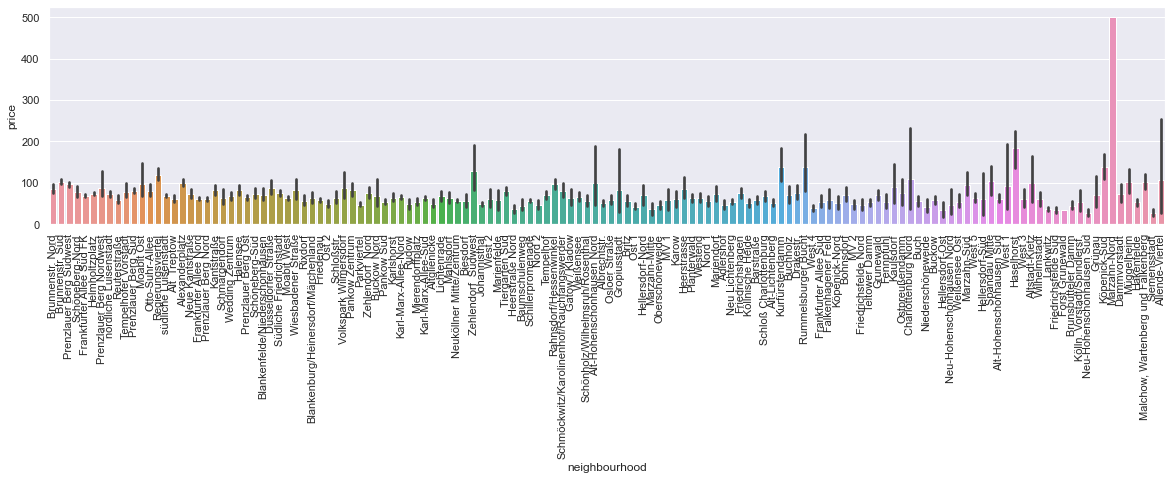

In [38]:
sns.set(rc={'figure.figsize':(20,4)})
dist_neighbourhood=sns.barplot(x="neighbourhood", y="price",data=df)
dist_neighbourhood.tick_params(axis='x', rotation=90)

The column of last_review has too much missing value and it doesn't show high correlation with price so I dropped that column. 
The column of neighbourhood has too much unique value so when converting the numerical value for model, it incerase  unnecessary dimension.I used the feature of neighbourhood for prediction. 

In [39]:
df.drop(['last_review','neighbourhood'], axis=1, inplace=True) 

In [40]:
df.drop(['name','host_id','host_name'], axis=1, inplace=True)

#Since these columns are unique value, dummication will also create unnecessary columns and increase the database size. Therefore, the relevant column has been deleted.

In [41]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [42]:
df = df.loc[~((df.price == 0)|(df.price>300))]      


In [43]:
df.loc[df['price'] == 0]
df.loc[df['price'] >= 300]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
625,Mitte,52.52746,13.40781,Entire home/apt,300,3,12,0.14,1,7
3513,Friedrichshain-Kreuzberg,52.48710,13.38033,Entire home/apt,300,5,0,0.00,1,0
3891,Tempelhof - Schöneberg,52.48486,13.38390,Entire home/apt,300,3,2,0.03,1,0
4884,Treptow - Köpenick,52.48836,13.45377,Private room,300,1,0,0.00,1,0
5750,Pankow,52.53459,13.43694,Entire home/apt,300,2,7,0.12,1,364
6054,Pankow,52.53140,13.43131,Entire home/apt,300,3,38,0.76,2,1
6428,Charlottenburg-Wilm.,52.50499,13.31019,Entire home/apt,300,3,27,0.53,1,365
6762,Pankow,52.54756,13.41141,Entire home/apt,300,3,9,0.23,1,355
6774,Pankow,52.52309,13.45869,Entire home/apt,300,3,117,2.28,1,30
7524,Mitte,52.51380,13.38149,Entire home/apt,300,2,34,1.05,25,358


# Splitting the Data into Training and Test Sets

In [44]:
y = df[['price']]                #price is target
x= df.drop('price', axis=1)

In [45]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (13205, 9)
X_test: (5660, 9)
y_train: (13205, 1)
y_test: (5660, 1)


Since some of the machine learning algorithms in sckitlearn library can not handle the categorical values, we are dummyfying each categorical value after splitting the dataset to prevent data leakage.

In [46]:
enc=OneHotEncoder(sparse = False)            
x_train_df=pd.DataFrame(x_train)
x_train=enc.fit_transform(x_train_df[['room_type','neighbourhood_group']])

x_train_df_enc=pd.DataFrame(x_train)

x_test_df=pd.DataFrame(x_test)
x_test=enc.transform(x_test_df[['room_type','neighbourhood_group']])







In [47]:
print(enc.categories_)


[array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object), array(['Charlottenburg-Wilm.', 'Friedrichshain-Kreuzberg', 'Lichtenberg',
       'Marzahn - Hellersdorf', 'Mitte', 'Neukölln', 'Pankow',
       'Reinickendorf', 'Spandau', 'Steglitz - Zehlendorf',
       'Tempelhof - Schöneberg', 'Treptow - Köpenick'], dtype=object)]


In [48]:
scaler = StandardScaler()           # Standartization 
x_train= scaler.fit_transform(x_train)
df_sc = pd.DataFrame(x_train)
x_test=scaler.transform(x_test)



# Modelling 

Here we are going with 2 approach for classification :

1. We will show the default classification results
2. We will create a pipeline and show classification results 

Note : The optimization score is as stated on top :**RMSE**

## Random Forest 

In [49]:
RF_reg= RandomForestRegressor(random_state=42)
RF_reg.fit(x_train, y_train)
y_pred_test = RF_reg.predict(x_test)
y_pred_train= RF_reg.predict(x_train)

In [50]:
y_pred_test

array([42.5865445 , 95.34385475, 82.32858723, ..., 41.76819336,
       81.37188696, 86.18955071])

In [51]:
print(RF_reg.score(x_test, y_test, sample_weight=None))
print(mean_squared_error(y_test, y_pred_test,squared=False))

result_RANDOM_FOREST = {
            'REGRESSİON_MODEL':'RANDOM FOREST REGRESSOR',
            'RMSE train': mean_squared_error(y_train,y_pred_train,squared=False),
            'RMSE test' : mean_squared_error(y_test, y_pred_test,squared=False),
            'R_square' : RF_reg.score(x_test, y_test),
          }

0.24427895650772735
39.01136277113807


## Gradient Boosting 

In [52]:
GB_reg = GradientBoostingRegressor(random_state=42)
GB_reg.fit(x_train, y_train)
y_pred_test = GB_reg.predict(x_test)
y_pred_train= GB_reg.predict(x_train)

In [53]:
y_pred_test

array([42.11904149, 95.0991687 , 82.83922514, ..., 42.19205464,
       82.27852817, 85.93307904])

In [54]:
print(GB_reg.score(x_test, y_test, sample_weight=None))
print(mean_squared_error(y_test, y_pred_test,squared=False))

result_GRADIENT_BOOSTING = {
            'REGRESSİON_MODEL':'GRADIENT BOOSTING REGRESSOR',
            'RMSE train': mean_squared_error(y_train,y_pred_train,squared=False),
            'RMSE test' : mean_squared_error(y_test, y_pred_test,squared=False),
            'R_square' : GB_reg.score(x_test, y_test),
          }

0.2446218167712042
39.00251230730501


## ADABoost 

In [55]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg =AdaBoostRegressor(random_state=42)
ada_reg.fit(x_train,y_train)
y_pred_test = ada_reg.predict(x_test)
y_pred_train=ada_reg.predict(x_train)

In [56]:
y_pred_test

array([43.88448374, 99.04485336, 97.77305231, ..., 43.88448374,
       97.77305231, 97.77305231])

In [58]:
print(ada_reg.score(x_test, y_test,sample_weight=None))
print(mean_squared_error(y_test, y_pred_test,squared=False))


result_ADA_BOOST = {
            'REGRESSİON_MODEL':'ADA BOOST',
            'RMSE train': mean_squared_error(y_train,y_pred_train,squared=False),
            'RMSE test' : mean_squared_error(y_test, y_pred_test,squared=False),
            'R_square' : ada_reg.score(x_test, y_test),
          }

0.16526595171310854
41.00005394103147


## XGBoost Regression

In [59]:
import xgboost as xgb
XG_reg=xgb.XGBRegressor()
XG_reg.fit(x_train,y_train)
y_pred_test=XG_reg.predict(x_test)
y_pred_train= XG_reg.predict(x_train)

In [60]:
y_pred_test

array([42.591465, 95.30398 , 82.03165 , ..., 41.800785, 81.88037 ,
       86.18737 ], dtype=float32)

In [61]:
print(XG_reg.score(x_test, y_test))
print(mean_squared_error(y_test, y_pred_test,squared=False))


result_XG_BOOSTING = {
            'REGRESSİON_MODEL':'XGBOOST REGRESSOR',
            'RMSE train': mean_squared_error(y_train,y_pred_train,squared=False),
            'RMSE test' : mean_squared_error(y_test, y_pred_test,squared=False),
            'R_square' : XG_reg.score(x_test, y_test),
          }

0.2439277642052986
39.0204262338444


## MLP Regressor

In [62]:
MLP_reg=MLPRegressor(random_state=42)
MLP_reg.fit(x_train, y_train)
y_pred_test=MLP_reg.predict(x_test)
y_pred_train= MLP_reg.predict(x_train)

In [63]:
y_pred_test

array([43.22782097, 94.75278819, 84.92549791, ..., 41.40306864,
       83.90773529, 86.48123891])

In [64]:
print(MLP_reg.score(x_test, y_test, sample_weight=None))
print(mean_squared_error(y_test, y_pred_test,squared=False))

result_MULTI_LAYER_PERCEPTRON = {
            'REGRESSİON_MODEL':'MLP REGRESSOR',
            'RMSE train': mean_squared_error(y_train,y_pred_train,squared=False),
            'RMSE test' : mean_squared_error(y_test, y_pred_test,squared=False),
            'R_square' : MLP_reg.score(x_test, y_test),
          }

0.24481415041112875
38.997546600794394


## RESULTS OF DEFAULT MODELS:

In [65]:
Defaults = pd.DataFrame([result_RANDOM_FOREST,result_GRADIENT_BOOSTING,result_ADA_BOOST,result_XG_BOOSTING,result_MULTI_LAYER_PERCEPTRON])
Defaults

,REGRESSİON_MODEL,RMSE train,RMSE test,R_square
0,RANDOM FOREST REGRESSOR,39.998128,39.011363,0.244279
1,GRADIENT BOOSTING REGRESSOR,40.001744,39.002512,0.244622
2,ADA BOOST,41.895707,41.000054,0.165266
3,XGBOOST REGRESSOR,39.997342,39.020426,0.243928
4,MLP REGRESSOR,40.013246,38.997547,0.244814


With deafult values shows us the **MLP regressor** model gives best result with 38.9975 so far.

# Tuning Hyperparameter and Pipeline 

In [66]:
import math
import sklearn.metrics as sklm

## Random Forest Regression 

In [67]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('RF_reg', RandomForestRegressor(random_state=42, n_jobs=-1 ))])

params={    "RF_reg__n_estimators"     : [10, 20, 40],
            "RF_reg__min_samples_leaf" : [1, 3, 5],
            "RF_reg__min_samples_split": [2, 4],
            "RF_reg__max_depth"        : [3, 4, 5, 6],
            "RF_reg__max_features"     : ['sqrt', None]}


In [68]:
grid = GridSearchCV(estimator = pipeline, param_grid = params, cv = 3 ,scoring='neg_mean_squared_error')


grid.fit(x_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print("MSE-train::{}".format(-1*grid.best_score_))

Best grid parameters      : {'RF_reg__max_depth': 6, 'RF_reg__max_features': 'sqrt', 'RF_reg__min_samples_leaf': 1, 'RF_reg__min_samples_split': 2, 'RF_reg__n_estimators': 10} 

MSE-train::1609.9652462693196


In [69]:
rf_pred_test = grid.predict(x_test)
rf_pred = grid.predict(x_train)

print('RMSE train: ' + str(np.sqrt(sklm.mean_squared_error(rf_pred, y_train))))
print('RMSE test: ' + str(np.sqrt(sklm.mean_squared_error(rf_pred_test, y_test))))


result_RANDOM_FOREST = {
            'REGRESSİON_MODEL':'RANDOM FOREST REGRESSOR',
            'RMSE train': np.sqrt(sklm.mean_squared_error(rf_pred, y_train)),
            'RMSE test' : np.sqrt(sklm.mean_squared_error(rf_pred_test, y_test))
          }

RMSE train: 40.06245686397722
RMSE test: 39.027615953208624


## Gradient Boosting Regressor

In [70]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('GB_reg', GradientBoostingRegressor(random_state=42 ))])

params = { 'GB_reg__learning_rate': [0.1,0.3],
           'GB_reg__n_estimators' : [100,500], 
           'GB_reg__max_features' : ['auto', 'sqrt', 'log2'],
           'GB_reg__max_depth':     [3,4,5],
           'GB_reg__min_samples_leaf': [1,2,3],
           'GB_reg__min_samples_split':[2,3,4]
          }

In [71]:
grid = GridSearchCV(estimator = pipeline, param_grid = params, cv = 3 ,scoring='neg_mean_squared_error')


grid.fit(x_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print("MSE-train::{}".format(-1*grid.best_score_))

Best grid parameters      : {'GB_reg__learning_rate': 0.1, 'GB_reg__max_depth': 3, 'GB_reg__max_features': 'auto', 'GB_reg__min_samples_leaf': 3, 'GB_reg__min_samples_split': 2, 'GB_reg__n_estimators': 100} 

MSE-train::1609.1429948242078


In [72]:
GB_pred_test = grid.predict(x_test)
GB_pred = grid.predict(x_train)

print('RMSE train: ' + str(np.sqrt(sklm.mean_squared_error(GB_pred, y_train))))
print('RMSE test: ' + str(np.sqrt(sklm.mean_squared_error(GB_pred_test, y_test))))

result_GRADIENT_BOOSTING = {
            'REGRESSİON_MODEL':'GRADIENT BOOSTING REGRESSOR',
            'RMSE train': np.sqrt(sklm.mean_squared_error(GB_pred, y_train)),
            'RMSE test' : np.sqrt(sklm.mean_squared_error(GB_pred_test, y_test))
          }

RMSE train: 40.00537563266703
RMSE test: 38.992014689667045


## ADABoost 

In [73]:
pipeline = Pipeline([('ADA_reg', AdaBoostRegressor(random_state=42 ))])

params = { 'ADA_reg__learning_rate': [0.1,1.0,2.0],
           'ADA_reg__n_estimators' : [50,100,200], 
           'ADA_reg__loss' : ['linear', 'exponential']
           
          }



In [74]:
grid = GridSearchCV(estimator = pipeline, param_grid = params, cv = 3 ,scoring='neg_mean_squared_error')


grid.fit(x_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print("MSE-train::{}".format(-1*grid.best_score_))

Best grid parameters      : {'ADA_reg__learning_rate': 2.0, 'ADA_reg__loss': 'linear', 'ADA_reg__n_estimators': 50} 

MSE-train::1644.419056106668


In [75]:
ADA_pred_test = grid.predict(x_test)
ADA_pred = grid.predict(x_train)

print('RMSE train: ' + str(np.sqrt(sklm.mean_squared_error(ADA_pred, y_train))))
print('RMSE test: ' + str(np.sqrt(sklm.mean_squared_error(ADA_pred_test, y_test))))

result_ADA_BOOSTING = {
            'REGRESSİON_MODEL':'ADA BOOSTING REGRESSOR',
            'RMSE train': np.sqrt(sklm.mean_squared_error(ADA_pred, y_train)),
            'RMSE test' : np.sqrt(sklm.mean_squared_error(ADA_pred_test, y_test))
          }

RMSE train: 40.54866391182058
RMSE test: 39.219998484952676


## XGBoost Regression

In [78]:

XG_reg=xgb.XGBRegressor()


pipeline = Pipeline([('scaler', StandardScaler()),
                     ('XG_reg', xgb.XGBRegressor(random_state=42 ))])

params = {      'XG_reg__eta':[0.1,0.3,0.5],
                'XG_reg__max_depth':[5,6,7],
                'XG_reg__n_estimators': [200,500],
                'XG_reg__subsample':[0.3,0.5,0.9]
                 }

In [79]:
grid= GridSearchCV(estimator=pipeline, param_grid=params, scoring='neg_mean_squared_error', cv=3)
grid.fit(x_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print("MSE-train::{}".format(-1*grid.best_score_))                

Best grid parameters      : {'XG_reg__eta': 0.1, 'XG_reg__max_depth': 5, 'XG_reg__n_estimators': 200, 'XG_reg__subsample': 0.5} 

MSE-train::1611.1628047700906


In [80]:
XG_pred_test = grid.predict(x_test)
XG_pred = grid.predict(x_train)
print('RMSE train: ' + str(np.sqrt(sklm.mean_squared_error(XG_pred, y_train))))
print('RMSE test: ' + str(np.sqrt(sklm.mean_squared_error(XG_pred_test, y_test))))

result_XG_BOOSTING = {
            'REGRESSİON_MODEL':'XGBOOST REGRESSOR',
            'RMSE train': np.sqrt(sklm.mean_squared_error(XG_pred, y_train)),
            'RMSE test' : np.sqrt(sklm.mean_squared_error(XG_pred_test, y_test))
          }

RMSE train: 40.00104336145994
RMSE test: 39.0341154580412


## MLP Regressor

In [81]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('MLP_reg', MLPRegressor(random_state=42 ))])

params = { 'MLP_reg__hidden_layer_sizes': [(100,20),(200,20)],
           'MLP_reg__max_iter' : [100,200], 
           'MLP_reg__tol' : [0.001,0.00001],
           
          }

In [82]:
grid = GridSearchCV(estimator = pipeline, param_grid = params, cv = 3 ,scoring='neg_mean_squared_error')


grid.fit(x_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print("MSE-train::{}".format(-1*grid.best_score_))

Best grid parameters      : {'MLP_reg__hidden_layer_sizes': (200, 20), 'MLP_reg__max_iter': 100, 'MLP_reg__tol': 0.001} 

MSE-train::1612.340387976579


In [84]:
MLP_pred_test = grid.predict(x_test)
MLP_pred = grid.predict(x_train)
print('RMSE train: ' + str(np.sqrt(sklm.mean_squared_error(MLP_pred, y_train))))
print('RMSE test: ' + str(np.sqrt(sklm.mean_squared_error(MLP_pred_test, y_test))))

result_MULTI_LAYER_PERCEPTRON = {
            'REGRESSİON_MODEL':'MLP REGRESSOR',
            'RMSE train': np.sqrt(sklm.mean_squared_error(MLP_pred, y_train)),
            'RMSE test' : np.sqrt(sklm.mean_squared_error(MLP_pred_test, y_test))
          }

RMSE train: 40.023600493294694
RMSE test: 39.00786997351683


In [85]:
Tunned = pd.DataFrame([result_RANDOM_FOREST,result_GRADIENT_BOOSTING,result_ADA_BOOSTING,result_XG_BOOSTING,result_MULTI_LAYER_PERCEPTRON])
Tunned

,REGRESSİON_MODEL,RMSE train,RMSE test
0,RANDOM FOREST REGRESSOR,40.062457,39.027616
1,GRADIENT BOOSTING REGRESSOR,40.005376,38.992015
2,ADA BOOSTING REGRESSOR,40.548664,39.219998
3,XGBOOST REGRESSOR,40.001043,39.034115
4,MLP REGRESSOR,40.023600,39.007870


## Evaluation and Discussion

After the parameter tunning we are observing little enhancement for all models.The best parameter model is **Gradient Boosting Regressor** with **38.9920 RMSE score.**
Although I used neural network model (MLP) it didn't seen signifigant difference among the models.According to academic researches, it works better with big dataset,since in this dataset isn't big MLP regressor didn't give good score.

#### Strengths and Limitations : 

**1.st** :The dataset had not enough special features to specify house price.The price range is wide, but there is no specific feature that explain the reason for the high price.
     
**2.nd** :The dataset has only values of July 2021.Since house prices may change according to the period, the estimated price obtained does not give an overall score.For more accurate and annual prediction a dataset with 
a dataset with data containing all months should be used.

**3.rd** : Because we have a lot of categorical features,I used to dummyfy some columns and dropped some that don't show any high correlation with price.
            
